# Introduction

**This notebook is a guide for beginners into machine learning, classification to be more specific. There will be comments every step of the way so there is a clear understanding. We will be building a system that predicts whether a woman has  diabetes or not given a set of information about that woman.**

# Supervised vs Unsupervised Machine Learning

**Machine learning is divided into supervised and unsupervised learning. We train our model with data that we have previously acquired in supervised learning. In unsupervised learning, we have no data that we can train our model with.**

**Supervised machine learning is divided into classification and regression. In classification, we predict discrete values, e.g. Yes/No, Customer will purchase/Won't purchase. But in regression, we predict continuous values, such as age, price, etc.**

# Importing Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**All patients here are females at least 21 years old.**

In [3]:
# Outcome column is the dependent variable (basically telling us if the person has diabetes or not). I'll rename it to 'result'.
df = df.rename(columns={'Outcome':'Result'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Missing Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Result                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Good thing we have no missing values in this dataset so no imputation (replacing missing values with other appropriate ones) necessary.**

# Exploratory Data Analysis

<AxesSubplot:>

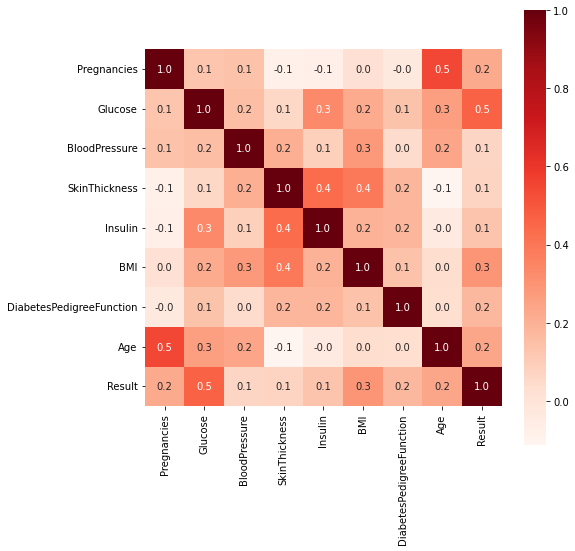

In [5]:
# We can use a heatmap to check correlation between the variables.
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

**We can make observations such as, as glucose increases, the likelihood of having diabetes increases.**

In [6]:
# Checking how many samples we have for non-diabetics and for diabetics
df['Result'].value_counts()

0    500
1    268
Name: Result, dtype: int64

<AxesSubplot:xlabel='Result', ylabel='count'>

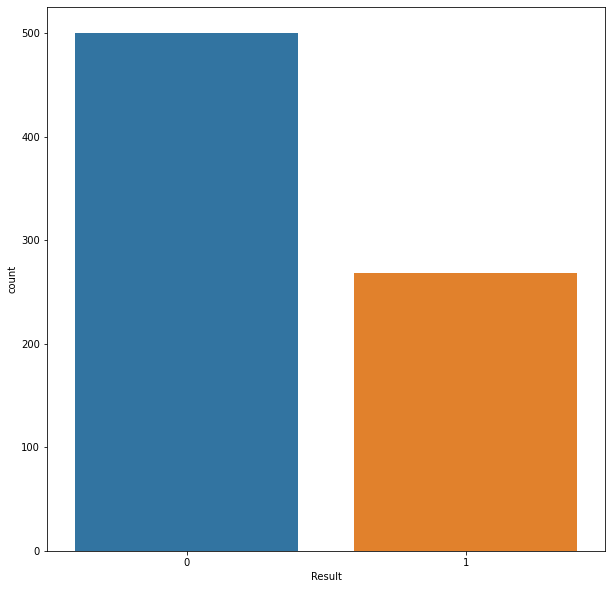

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(x="Result", data=df)

**We have more non-diabetic samples than diabetics. Also, we only have 786 samples total which is very less. Predictions would be more reliable if we had more data.**

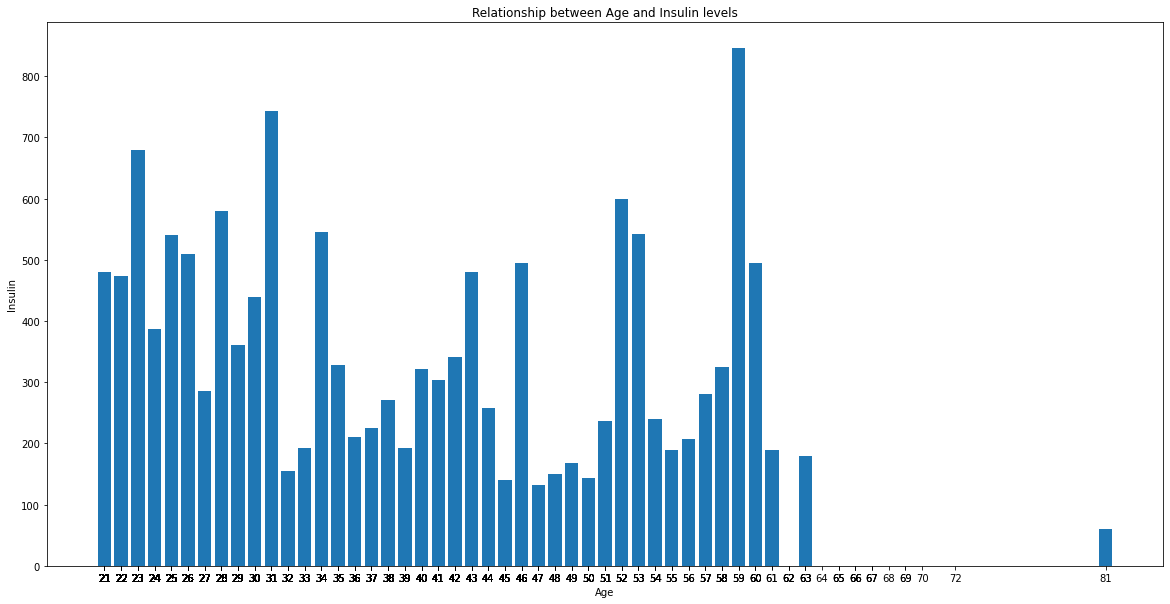

In [8]:
# Age vs Insulin
x = []
for age in df.Age:
    x.append(age)
y = df.Insulin
plt.figure(figsize=(20,10))
plt.bar(x,y)
#for index, value in enumerate(y):
 #   plt.text(index, value, str(value),color='blue',size=10,fontweight='bold')
plt.xlabel("Age",size=10)
plt.ylabel("Insulin")
plt.xticks(x)
plt.title("Relationship between Age and Insulin levels")
plt.show()
plt.show()

**We can see that 59 year olds have highest insulin levels but there is no real trend visible. Insulin levels keep varying, but maybe if we had more samples, a trend could be more obvious**

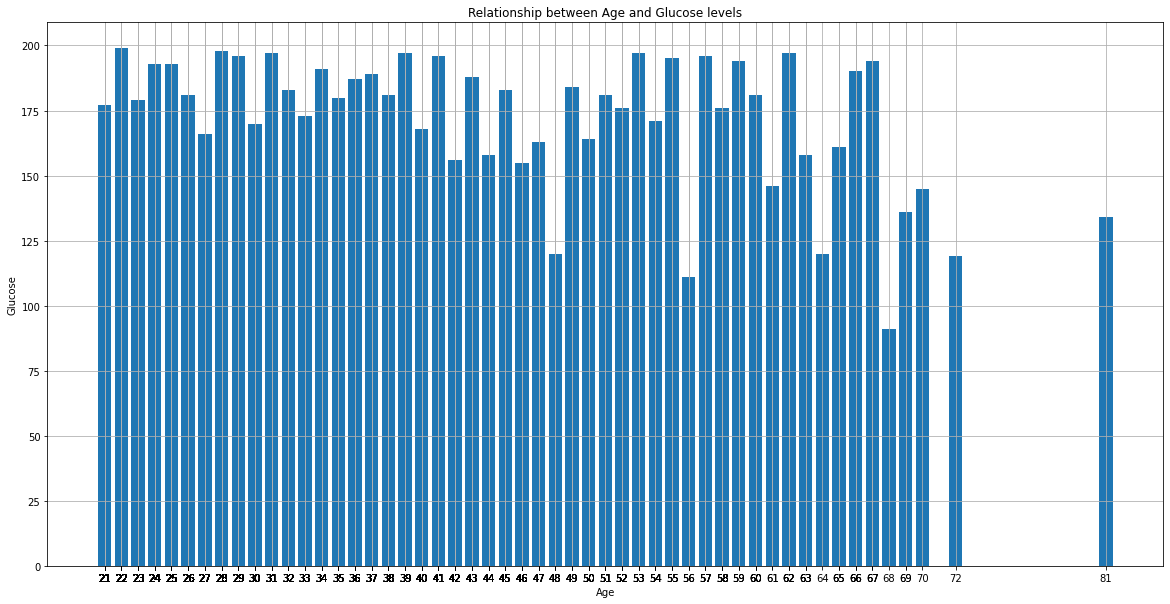

In [9]:
# Age vs Glucose
x = []
for age in df.Age:
    x.append(age)
y = df.Glucose
plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.xlabel("Age",size=10)
plt.ylabel("Glucose")
plt.xticks(x)
plt.grid()
plt.title("Relationship between Age and Glucose levels")
plt.show()

**Again, no real trend found. But, interestingly 22 year olds have the highest glucose in their blood and 68 year olds have the least.**

In [10]:
# We'll check mean values of the dependent variables for diabetics and non-diabetics
df.groupby('Result').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Result,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


**From here, we can make deductions such as:**
* Women with more pregnancies tend to be more diabetic. 
* Non-diabetics tend to have lower glucose levels.
* Non-diabetics tend to have lower blood pressure.
* Diabetics have higher insulin levels.
* Diabetics weigh more than non-diabetics.
* Diabetics are older than non-diabetics on an average.

# Splitting Data

In [11]:
# We need to split the data
X = df.drop(['Result'],axis=1) # We need all the variables (columns) as independent variables so we're just dropping the target column to make things easier.
y = df['Result'] # Target.

# Data Standardization

**All our columns have variable ranges. This could cause some problems for our ML model to make prediction. So, we should standardize the data, bring all of it to a similar range so it's easy for our model to understand the data.**

In [12]:
Scaler = StandardScaler()
StandardizedData = Scaler.fit_transform(X)
print(StandardizedData)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


**Now all our columns are in same range**

In [13]:
X = StandardizedData

In [14]:
# Then we split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2) # 80% data will be used for training the model and rest 20% for testing.

In [15]:
X.shape

(768, 8)

In [16]:
X_train.shape

(614, 8)

**As we can see, 614 rows are used for testing out of 768 which is about 79.9% of the data.**

# Classification

**We're going to use Support Vector Machine for our classifier. It uses a technique called the kernel trick to transform the data and then based on these transformations it finds an optimal boundary between the possible outputs.**

In [17]:
model = svm.SVC(kernel='linear')

In [18]:
# Now we need to train the model
model.fit(X_train,y_train) # fitting means training

SVC(kernel='linear')

# Prediction and Evaluation of the Model

**First, we need to use the model to predict diabetes/not from the training data. Then, we check our model's accuracy using accuracy score (for classification).**

In [19]:
train_pred = model.predict(X_train)
train_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
# Now let's check accuracy score on training data
Training_score = accuracy_score(train_pred,y_train) #(Basically comparing the original y_train and predictions and seeing difference/error)
print("Accuracy Score:",Training_score)

Accuracy Score: 0.7719869706840391


**This means our model is 77% accurate which is good enough.**

**But keep in mind that we used training data to check accuracy. We need to check using test data for a better understanding.**

In [21]:
test_pred = model.predict(X_test)
test_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [22]:
# Accuracy Score
Test_score = accuracy_score(test_pred,y_test) 
print("Accuracy Score:",Test_score)

Accuracy Score: 0.7662337662337663


**Our model was 76.6% accurate with test data so we can say this is a pretty accurate model.**

# Conclusion

So basically the workflow is like this: Import libraries and dataset -> check for missing values -> perform necessary imputation -> Exploratory Data Analysis -> split data -> Data Standardization -> train model -> check its accuracy -> improve model or try other ones.

**To get better accuracy, try different models or use more training data.**